### blood pressure

In [2]:
from simpful import *

In [3]:
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.5 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



##### Fuzzy variables for the blood pressure

In [4]:
S_1 = FuzzySet(function=Trapezoidal_MF(a=100, b=100, c = 120, d = 130), term = "Optimal")
S_2 = FuzzySet(function=Trapezoidal_MF(a=110, b=120, c = 130, d = 140), term = "Average")
S_3 = FuzzySet(function=Trapezoidal_MF(a=120, b=130, c = 140, d = 150), term = "High")
S_4 = FuzzySet(function=Trapezoidal_MF(a=130, b=140, c = 160, d = 170), term = "Grade_1_hypertension")
S_5 = FuzzySet(function=Trapezoidal_MF(a=150, b=160, c = 180, d = 190), term = "Grade_2_hypertension")
S_6 = FuzzySet(function=Trapezoidal_MF(c=180, a =0.5 ), term = "Grade_3_hypertension")
S_7 = FuzzySet(function=Trapezoidal_MF(a=190, b=200, c=250,d=250), term = "Hypertensional_crisis")
FS.add_linguistic_variable("Blood_pressure", LinguisticVariable([S_1, S_2, S_3, S_4, S_5, S_6, S_7], concept="Blood_pressure", universe_of_discourse=[90,200]))

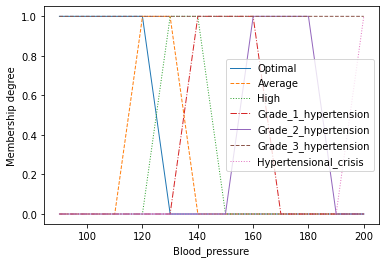

In [5]:
FS.plot_variable("Blood_pressure")

#### Fuzzy variables for the heart beat

In [6]:
H_1 = FuzzySet(function=InvSigmoid_MF(c=40, a=0.1), term = "Low")
H_2 = FuzzySet(function=Gaussian_MF(mu=80, sigma=20), term = "Average")
H_3 = FuzzySet(function=Sigmoid_MF(c=100, a=0.1), term = "High")
FS.add_linguistic_variable("Heart_beat", LinguisticVariable([H_1, H_2, H_3], concept="Heart_beat", universe_of_discourse=[0,200]))

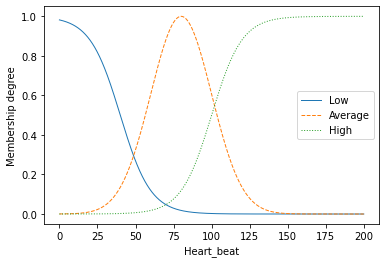

In [7]:
FS.plot_variable("Heart_beat")

#### Fuzzy variables for the Glucose level

In [8]:
G_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c = 2.8), term = "Low")
G_2 = FuzzySet(function=Trapezoidal_MF(a=2.8, b=4.1, c = 5.6, d = 7.8), term = "Normal")
G_3 = FuzzySet(function=Trapezoidal_MF(a=7.8, b=11.1, c = 11.1), term = "High")
FS.add_linguistic_variable("Glucose", LinguisticVariable([G_1, G_2, G_3], concept="Glucose", universe_of_discourse=[0,12]))

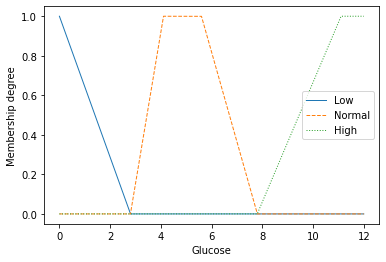

In [9]:
FS.plot_variable("Glucose")

#### Fuzzy variables for the glucose level

In [10]:
G_1 = FuzzySet(function=InvSigmoid_MF(c=4, a=1), term = "Low")
G_2 = FuzzySet(function=Gaussian_MF(mu=7.5, sigma=3), term = "Average")
G_3 = FuzzySet(function=Sigmoid_MF(c=10, a=1), term = "High")
FS.add_linguistic_variable("Leukocyte", LinguisticVariable([G_1, G_2, G_3], concept="Leukocyte", universe_of_discourse=[0,20]))

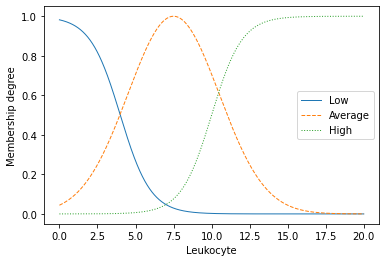

In [11]:
FS.plot_variable("Leukocyte")

### output functions

In [12]:
T_1 = FuzzySet(function=InvSigmoid_MF(c=15, a=0.3), term="Low")
T_2 = FuzzySet(function=Gaussian_MF(mu=50, sigma=20), term="Average")
T_3 = FuzzySet(function=Gaussian_MF(mu=80, sigma=10), term="High")
T_4 = FuzzySet(function=Sigmoid_MF(c=90, a=0.2), term="Panic")
FS.add_linguistic_variable("Prio", LinguisticVariable([T_1, T_2, T_3, T_4], universe_of_discourse=[0,100]))

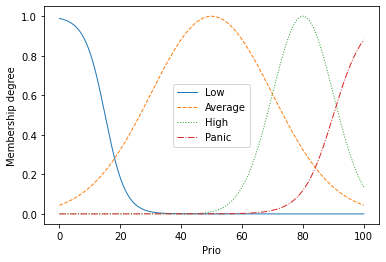

In [13]:
FS.plot_variable("Prio")

### Fuzzy rules

In [34]:
R1 = "IF (((Blood_pressure IS Average) OR (Blood_pressure IS Optimal)) AND (Heart_beat IS Average) AND (Leukocyte IS Average) AND (Glucose IS Normal)) THEN (Prio IS Low)"

R2 = "IF (((Blood_pressure IS High) OR (Blood_pressure IS Grade_1_hypertension) OR (Blood_pressure IS Grade_2_hypertension)) AND (Heart_beat IS Average) AND (Leukocyte IS Average) AND (Glucose IS Normal)) THEN (Prio IS Average)" 
R3 = "IF (((Blood_pressure IS Average) OR (Blood_pressure IS Optimal)) AND (((Heart_beat IS High) OR (Heart_beat IS Low)) AND (Leukocyte IS Average) AND (Glucose IS Normal))) THEN (Prio IS Average)"
R4 = "IF (((Blood_pressure IS Average) OR (Blood_pressure IS Optimal)) AND (Heart_beat IS Average) AND (((Leukocyte IS Low) OR (Leukocyte IS High)) AND (Glucose IS Normal))) THEN (Prio IS Average)"
R5 = "IF (((Blood_pressure IS Average) OR (Blood_pressure IS Optimal)) AND (Heart_beat IS Average) AND (Leukocyte IS Average) AND ((Glucose IS Low) OR (Glucose IS High))) THEN (Prio IS Average)"

R6 = "IF (Blood_pressure IS Hypertensional_crisis) THEN (Prio IS Panic)"
R7 = "IF (Blood_pressure IS Grade_3_hypertension) THEN (Prio IS High)"
R8 = "IF (Glucose IS Low) AND (Heart_beat IS High) THEN (Prio IS High)"
R9 = "IF (((Blood_pressure IS High) OR (Blood_pressure IS Grade_1_hypertension) OR (Blood_pressure IS Grade_2_hypertension)) AND (Heart_beat IS High)) THEN (Prio IS High)"
R10 = "IF ((Glucose IS High) AND ((Leukocyte IS Low) OR (Leukocyte IS High))) THEN (Prio IS High)"

FS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10])

### Setting variables and testing

In [35]:
FS.set_variable("Blood_pressure", 200)
FS.set_variable("Heart_beat", 80)
FS.set_variable("Glucose", 5)
FS.set_variable("Leukocyte", 7)

In [36]:
print(FS.Mamdani_inference(["Prio"]))

{'Prio': 81.8166033841934}
